
# 20Questionsゲームシミュレーション：勝利確率の計算

## はじめに

このチュートリアルでは、有名な推理ゲーム「20Questions」のシミュレーションを行う方法を学びます。Pythonを使用して、ゲームの勝利確率を計算し、その結果をグラフ化します。初心者の方でも理解しやすいよう、ステップバイステップで解説していきます。

## 20Questionsゲームとは

20Questionsは、プレイヤーが隠された単語を20問以内の質問で当てるゲームです。各質問は「はい」か「いいえ」で答えられるものに限定されます。

```mermaid
%%{init:{'theme':'base'}}%%
graph LR
    A[🎮 ゲーム開始] --> B{❓ 質問する}
    B -->|はい👍/いいえ👎| C{⏱️ 20問以内?}
    C -->|はい👍| D{🤔 単語を推測}
    C -->|いいえ👎| E[😢 ゲーム終了: 負け]
    D -->|正解✅| F[🎉 ゲーム終了: 勝ち]
    D -->|不正解❌| B
```

## シミュレーションの概要

このシミュレーションでは、異なる「削減係数」を用いて、各ラウンドでの勝利確率を計算します。削減係数は、各質問後に残る候補単語の割合を表します。

## 確率計算の理論

勝利確率の計算には、以下の要素が関係します：

1. N: 初期の単語候補数
2. k: 質問回数
3. r: 削減係数（各質問後に残る候補単語の割合）

各ラウンドkでの単語候補数Nkは次のように計算されます：

```
Nk = N * (r^k)
```

そして、各ラウンドでの勝利確率Pkは：

```
Pk = (1 - P(k-1)) * (1 / Nk)
```

ここで、P(k-1)は前のラウンドまでの累積勝利確率です。

## Pythonによる実装

それでは、Pythonを使ってこのシミュレーションを実装していきましょう。

### 必要なライブラリのインポート

まず、必要なライブラリをインポートします。

In [1]:
import matplotlib.pyplot as plt

このコードでは、グラフ描画のためにmatplotlibライブラリをインポートしています。

### 勝利確率の計算

次に、各ラウンドの勝利確率を計算する関数を定義します。

In [2]:
def calculate_win_probabilities(N: int, rounds: int, reduction_factor: float) -> list[float]:
    """
    各ラウンドの累積勝利確率を計算する関数

    Args:
        N (int): 初期の単語候補数
        rounds (int): 質問の総数
        reduction_factor (float): 各ラウンドで候補数が減少する割合

    Returns:
        list[float]: 各ラウンドの累積勝利確率のリスト
    """
    cumulative_probabilities = []
    previous_prob = 0

    for k in range(1, rounds + 1):
        # 現在のラウンドでの候補数を計算
        Nk = N * (reduction_factor ** k)
        # 現在のラウンドでの勝利確率を計算
        current_prob = (1 - previous_prob) * (1 / Nk)
        # 累積確率を更新
        previous_prob += current_prob
        if previous_prob > 1:
            previous_prob = 1  # 勝利確率が1を超えないようにする
        cumulative_probabilities.append(previous_prob)

    return cumulative_probabilities

この関数は、初期候補数、ラウンド数、削減係数を受け取り、各ラウンドの累積勝利確率を計算して返します。

### 確率のプロット

計算した確率をグラフ化する関数を定義します。

In [3]:

def plot_cumulative_probabilities(probabilities_dict: dict[float, list[float]]):
    """
    Plot the cumulative winning probabilities

    Args:
        probabilities_dict (dict[float, list[float]]): 
            Dictionary of cumulative winning probabilities for each reduction factor
    """
    plt.figure(figsize=(12, 8))
    
    for reduction_factor, probabilities in probabilities_dict.items():
        rounds = range(1, len(probabilities) + 1)
        plt.plot(rounds, probabilities, marker='o', linestyle='-', 
                 label=f'Reduction Factor = {reduction_factor}')

    # Graph settings
    plt.xlabel('Round')
    plt.ylabel('Cumulative Winning Probability')
    plt.title('Cumulative Winning Probability per Round for Different Reduction Factors')
    plt.grid(True)
    plt.xticks(range(1, 21))
    plt.yticks([i/10 for i in range(11)])
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


この関数は、異なる削減係数での確率をまとめてプロットします。

### メイン関数

最後に、すべての処理を統合するメイン関数を定義します。

削減係数 0.5, ラウンド 1: 累積勝利確率 = 0.0019531250
削減係数 0.5, ラウンド 2: 累積勝利確率 = 0.0058517456
削減係数 0.5, ラウンド 3: 累積勝利確率 = 0.0136185288
削減係数 0.5, ラウンド 4: 累積勝利確率 = 0.0290307393
削減係数 0.5, ラウンド 5: 累積勝利確率 = 0.0593735287
削減係数 0.5, ラウンド 6: 累積勝利確率 = 0.1181626832
削減係数 0.5, ラウンド 7: 累積勝利確率 = 0.2283923478
削減係数 0.5, ラウンド 8: 累積勝利確率 = 0.4212942608
削減係数 0.5, ラウンド 9: 累積勝利確率 = 0.7106471304
削減係数 0.5, ラウンド 10: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 11: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 12: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 13: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 14: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 15: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 16: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 17: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 18: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 19: 累積勝利確率 = 1.0000000000
削減係数 0.5, ラウンド 20: 累積勝利確率 = 1.0000000000
削減係数 0.6, ラウンド 1: 累積勝利確率 = 0.0016276042
削減係数 0.6, ラウンド 2: 累積勝利確率 = 0.0043358626
削減係数 0.6, ラウンド 3: 累積勝利確率 = 0.0088373823
削減係数 0.6, ラウンド 4: 累積勝利確率 = 0.0163059953
削減係数 0.6, ラウンド 5: 累積勝利確率 = 0.

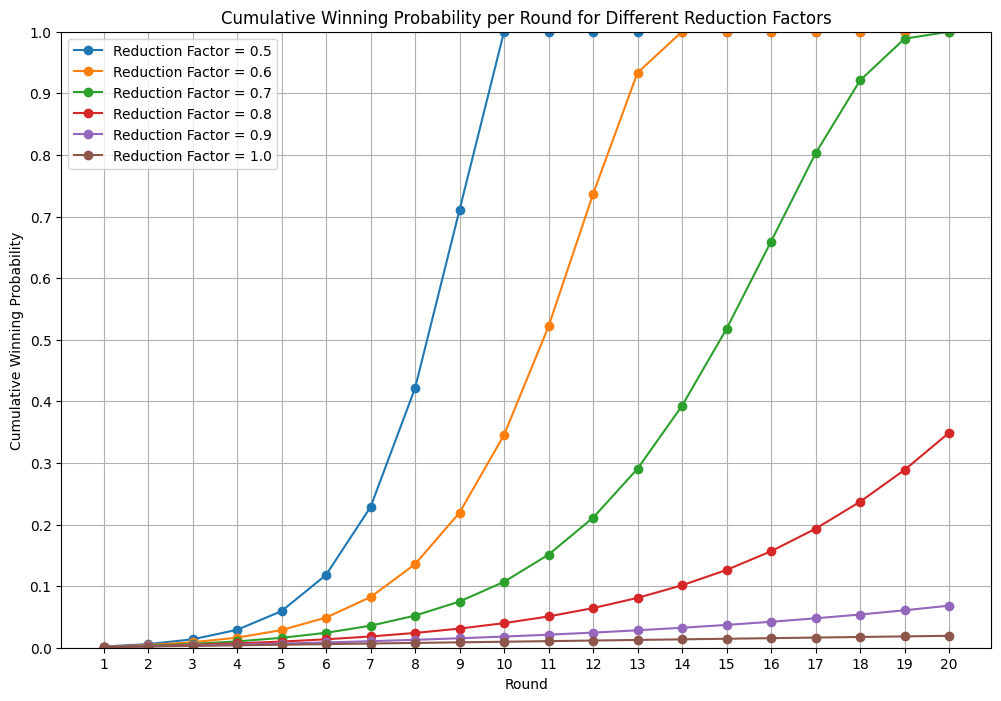

In [4]:
def main():
    N = 1024  # 初期の単語候補数
    rounds = 20  # 質問の総数
    reduction_factors = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # 異なる削減係数
    probabilities_dict = {}

    for reduction_factor in reduction_factors:
        # 各削減係数での確率を計算
        probabilities = calculate_win_probabilities(N, rounds, reduction_factor)
        probabilities_dict[reduction_factor] = probabilities
        # 結果を表示
        for i, prob in enumerate(probabilities, 1):
            print(f"削減係数 {reduction_factor}, ラウンド {i}: 累積勝利確率 = {prob:.10f}")

    # 結果をプロット
    plot_cumulative_probabilities(probabilities_dict)

if __name__ == "__main__":
    main()

このメイン関数は、異なる削減係数での確率を計算し、結果を表示してグラフ化します。

## 結果の解釈

シミュレーションの結果、以下のことが分かります：

1. 削減係数が小さいほど（各質問で候補が大きく減るほど）、早いラウンドで高い勝利確率に達します。
2. 削減係数が1.0の場合（質問が効果的でない場合）、勝利確率はほとんど上がりません。
3. 多くの場合、20ラウンド以内で勝利確率が非常に高くなります。

この結果は、効果的な質問戦略の重要性を示しています。

## まとめ

このチュートリアルでは、20Questionsゲームのシミュレーションを通じて、以下のことを学びました：

1. 確率計算の基本概念
2. Pythonを使用したシミュレーションの実装方法
3. matplotlib.pyplotを使用したデータの視覚化
4. 結果の解釈と実際のゲーム戦略への応用

このシミュレーションは、ゲーム理論や機械学習の分野でも応用可能な基本的な概念を含んでいます。ぜひ、パラメータを変更したり、新しい要素を追加したりして、さらに探究してみてください。